<a href="https://colab.research.google.com/github/mayuneko-re/notebook/blob/master/Buckley_Leverett_Gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 水-油置換問題の重力の影響（Buckley-Leverettによる解法）

Version 0.1 (Oct. 2019)

油で満たされている多孔質媒体に対し，水を圧入し水攻する．このとき，一次元／非圧縮／非混和条件を仮定すると，Buckley-Leverettの解法により、ある時間に対する飽和率分布を解析的に求めることができる。

[Buckley-Leverett Solution for water-oil displacement problem](https://github.com/mayuneko-re/notebook/blob/master/Buckley_Leverett_Basic.ipynb)

上記のノートブックでは重力の影響を無視してきた．
ここでは，重力の影響を確認する。

## ライブラリのインポート

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt

https://github.com/mayuneko-re/notebook.git にある buckley_leverett.py を使用する．

In [2]:
!rm -r notebook
!git clone https://github.com/mayuneko-re/notebook.git
sys.path.append('/content/notebook')
from buckley_leverett import BL

rm: cannot remove 'notebook': No such file or directory
Cloning into 'notebook'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 120 (delta 48), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (120/120), 692.76 KiB | 9.76 MiB/s, done.
Resolving deltas: 100% (48/48), done.


## 重力を考慮したフラクショナルフロー

毛細管圧力による影響は無視し，重力の影響を考慮した場合水のフラクショナルフロー関数は次のとおりになる．

$$
f_w = \frac{\lambda_w}{\lambda_t} \left( 1 - k_{ro} N_g  \sin \theta \right)
$$

ここで，$\lambda_w$ と $\lambda_t$ はそれぞれ水と両相のモビリティ， $N_g$ は重力数，$\theta$ は傾斜角である．
$N_g$ は次のとおり表される．

$$
N_g = \frac{\left( k / \mu_o \right) \Delta \rho g}{u_t}
$$

ここで，$k$ は絶対浸透率， $\Delta \rho$ は密度差 ($\Delta \rho = \rho_w - \rho_o$), $g$ は重力加速度である．

## 感度解析

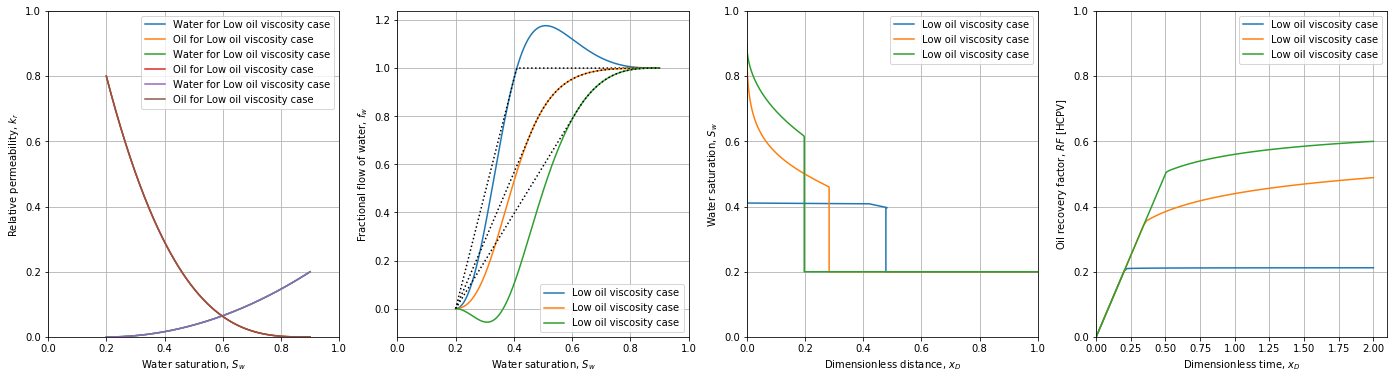

In [3]:
theta_list = [-30, 0 , 30]

d_core = {'Swc':0.2, 'Sor':0.1, 'krw0':0.2, 'kro0':0.8, 'nw':2, 'no':3}
d_fluid = {'muw':0.5, 'muo':10, 'label':'Low oil viscosity case'}

fig, ax = plt.subplots(1,4,figsize=(24, 6))

for theta in theta_list:
    # bl = BL(**d)
    bl = BL(**d_core, **d_fluid)
    bl.enable_gravity(theta, k=10, drho=0.2, ut=0.1)
    bl.calc()

    tD = np.linspace(start=0, stop=2, num = 100)
    
    # Plot ######
    # Relative permeability
    ax[0].plot(bl.Sw, bl.krw, label='Water for '+bl.label)
    ax[0].plot(bl.Sw, bl.kro, label='Oil for '+bl.label)
    
    # Fractional flow of water
    ax[1].plot(bl.Sw, bl.fw, label=bl.label)
    ax[1].plot(bl.Sw, bl.fw_wSF, 'k:')

    # Saturation profile at specific time
    xD, Sw = bl.get_Sw_profile(tD=0.1)
    ax[2].plot(xD, Sw, label=bl.label)

    # Oil recovery
    ax[3].plot(tD, bl.get_oil_RF(tD), label=bl.label)
    

def adjust_ax(ax, xlabel=None, ylabel=None, xlim=(0,1), ylim=(0,1)):
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()


adjust_ax(ax[0], 'Water saturation, $S_w$', 'Relative permeability, $k_r$')
adjust_ax(ax[1], 'Water saturation, $S_w$', 'Fractional flow of water, $f_w$', ylim=None)
adjust_ax(ax[2], 'Dimensionless distance, $x_D$', 'Water saturation, $S_w$')
adjust_ax(ax[3], 'Dimensionless time, $x_D$', 'Oil recovery factor, $RF$ [HCPV]', xlim=(0))

*End of notebook...*